In [1]:
import seaborn as sns   
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_path = font_manager.findfont("Times New Roman")  # Your font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.style.use('bmh')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 12

In [2]:
import numpy as np
from scipy import interpolate

perf_data_file = np.loadtxt('dataset/performance.txt')
numthreads = perf_data_file[:,0]
vdtime = perf_data_file[:,1]

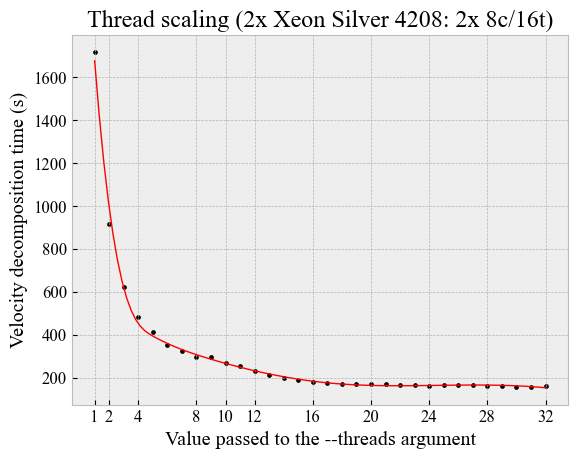

In [3]:
spline = interpolate.UnivariateSpline(numthreads, vdtime, s=1e4)
x_spline = np.linspace(min(numthreads),max(numthreads),100)
y_splime = spline(x_spline)
plt.plot(x_spline, y_splime, color='red', lw=1.0)

plt.scatter(numthreads, vdtime, marker='o', color='black', s=8.0)

plt.gca().set(
    title = r'Thread scaling (2x Xeon Silver 4208: 2x 8c/16t)',
    xlabel = 'Value passed to the --threads argument',
    ylabel = 'Velocity decomposition time (s)'
)

xlabel = [1,2,4,8,10,12,16,20,24,28,32]
plt.gca().set_xticks(xlabel,xlabel)
plt.savefig('scaling.png', dpi=100, bbox_inches='tight')
plt.show()
